In [1]:
import sys
import os
import glob as gb
sys.path.append('/home/cbenitez/')
import MTmp as mt
import matplotlib.pyplot as plt
import numpy as np
import oort_cons as oc

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


In [2]:
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker

In [4]:
op10 = mt.rop(op=10,limits=(0.6,.85,0.375,0.625,0.375,0.625))

Computing hilbert minimal domain description for output 10 ...
Done !

 Succesfully read the output file 10. 

Computing hilbert minimal domain description for output 11 ...
Done !


In [25]:
20*(op10.xx[1]-op10.xx[0])

0.6000001130284005

In [17]:
a_zz = [op10.dd[:,:,op10.nx/2+26]+1e-8,\
        op10.dd[:,op10.ny/2,:],\
        sum([op10.dd[:,:,x]+1e-7 for x in range(op10.nx/2+26-20,op10.nx/2+26+20)])*(op10.xx[1]-op10.xx[0])*mt.C.kpc.express(mt.C.cm),\
        sum([op10.dd[:,y,:] for y in range(op10.ny/2-20,op10.ny/2+20)])*(op10.xx[1]-op10.xx[0])*mt.C.kpc.express(mt.C.cm)]
a_xlab = ["$Y$  [kpc]","$X$  [kpc]","$Y$  [kpc]","$X$  [kpc]"]
a_ylab = ["$z$  [kpc]","$z$  [kpc]","$z$  [kpc]","$z$  [kpc]"]
a_zlab = [r"$n$ [cm$^{-3}$]",r"$n$ [cm$^{-3}$]",r"$N$ [cm$^{-3}$]",r"$N$ [cm$^{-2}$]"]
a_xlims = [(-1.5,1.5),(6,9),(-1.5,1.5),(6,9)]
a_ylims = [(-.5,2),(-.5,2),(-.5,2),(-.5,2)]
a_zlims=[(1.5e-1,1.5),(1.5e-1,1.5),(10e19,5e21),(10e19,5e21)]
a_extentto = [(op10.y_min,op10.y_max,op10.z_min,op10.z_max),\
            (op10.x_min,op10.x_max,op10.z_min,op10.z_max),\
            (op10.y_min,op10.y_max,op10.z_min,op10.z_max),\
            (op10.x_min,op10.x_max,op10.z_min,op10.z_max)]

In [18]:
shrink=.7
fontsize=22

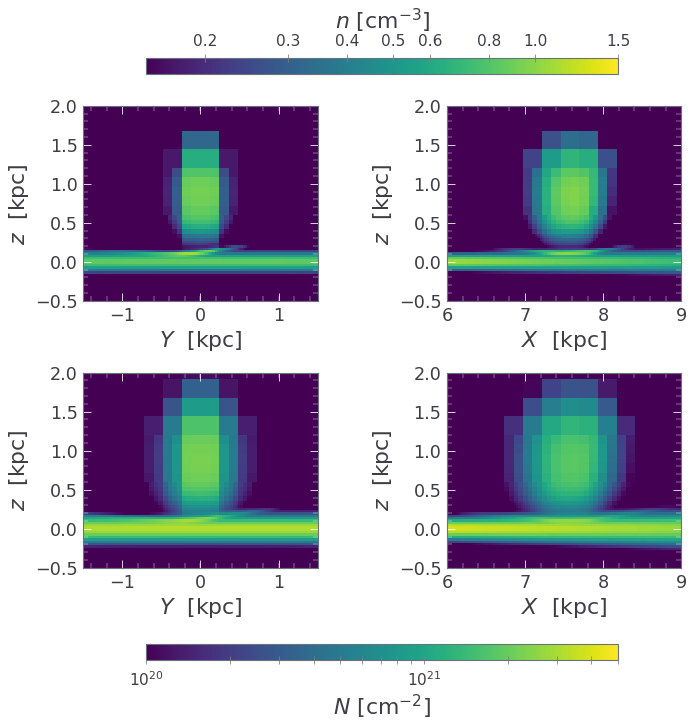

In [26]:
fig,axs = plt.subplots(2,2,figsize=(10,10),constrained_layout=True)
axsf = axs.flat
for i in range(len(axsf)):
    im = axsf[i].imshow(a_zz[i],extent=a_extentto[i],vmin=a_zlims[i][0], vmax=a_zlims[i][1],origin='lower',norm=LogNorm())
    
    axsf[i].set_xlabel(a_xlab[i],fontsize=fontsize)
    axsf[i].set_ylabel(a_ylab[i],fontsize=fontsize)
    #cbar = fig.colorbar(im,shrink = shrink)
    axsf[i].set_xlim(a_xlims[i][0],a_xlims[i][1])
    axsf[i].set_ylim(a_ylims[i][0],a_ylims[i][1])
    axsf[i].tick_params(which='major',direction='in',right=True,top=True,length=8,labelsize=fontsize*.8,color='white')
    axsf[i].minorticks_on()
    axsf[i].tick_params(which='minor',direction='in',right=True,top=True,length=5,color='white')


    if i==1:
        cbar = fig.colorbar(im, ax=axs[0, :], shrink=shrink, location='top',format="%0.1f")
        cbar.set_label(a_zlab[i], rotation=0,fontsize=fontsize)
        cbar.set_ticks([.2,.3,.4,.5,.6,.8,1.0,1.5])
        cbar.ax.tick_params(labelsize=fontsize*.7,rotation=0,size=8,direction='inout',color='grey',which="major")
        cbar.formatter.set_locs(2)
    if i==3:
        cbar = fig.colorbar(im, ax=axs[1, :], shrink=shrink, location='bottom')
        cbar.set_label(a_zlab[i], rotation=0,fontsize=fontsize)
        cbar.ax.tick_params(labelsize=fontsize*.7,rotation=0,size=8,direction='inout',color='grey',which="major")
fig.savefig("primer contacto.pdf", format='pdf',bbox_inches='tight')